# ROC curve and AUC

## 1. Goal

The goal of this exercise is to plot the roc curve and compute AUC. 


## 2. Basic concepts 

- The x-axis of ROC is false positive rate, which is defined as 

$$\text{FPR}=\frac{\text{false positive}}{\text{negative}}$$

- The y-axis of ROC is true positive rate, which is defined as 

$$\text{TPR}=\frac{\text{true positive}}{\text{positive}}$$

- AUC: area under the ROC curve


## 3. Code

Setup: there are two classes: class 0 (positive) and class 1 (negative)

First, we import the required package:

In [265]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')



Next, we define the following ROC function: 

In [266]:
def roc(groundtruth, predprob, theta):
    groundtruth_negative=np.where(groundtruth==1)[0]  # index of negative class
    groundtruth_positive=np.where(groundtruth==0)[0]  # index of positive class
    
    # predict
    predclass=np.tile(predprob, (len(theta), 1))>theta.reshape((-1,1))
    predclass=predclass.astype(int)   # convert true to 1 and false to 0
    
    predclass_positive=np.asarray(np.where(predclass==0)).T
    predclass_negative=np.asarray(np.where(predclass==1)).T
    
    
    # for loop: how can we avoid this for loop? 
    rate=np.zeros(len(theta)*3).reshape((len(theta), 3))  # first col: theta; second col: fpr; third col: tpr
    for i in np.arange(len(theta)):
        predclass_positive=np.where(predclass[i,]==0)[0]
        predclass_negative=np.where(predclass[i,]==1)[0]
        
        # threshold
        rate[i,0]=theta[i]
        # false positive rate
        rate[i,1]=len(np.intersect1d(predclass_positive, groundtruth_negative))/len(groundtruth_negative)
        # true positive rate
        rate[i,2]=len(np.intersect1d(predclass_positive, groundtruth_positive))/len(groundtruth_positive)
        
    # compute AUC  
    sortedfpr=np.sort(rate[:,1])
    sortedtpr=np.sort(rate[:,2])
    auc=np.dot(sortedfpr[1:(len(theta)-1)]-sortedfpr[0:(len(theta)-2)], sortedtpr[1:(len(theta)-1)])
    
    return rate, auc

    
    

## 4. Examples

In [308]:
groundtruth=np.random.choice(np.array([0,1]), 10000)
zr_ind=np.where(groundtruth==0)[0]
predprob=np.random.beta(a=8, b=10, size=10000)
predprob[zr_ind]=np.random.beta(a=3,b=10,size=len(zr_ind))
theta=np.arange(0.05, 0.95, 0.01)

In [309]:
rate, auc=roc(groundtruth, predprob, theta)
#print(rate)
print(auc)

0.9085541230643248


Next, we plot the roc curve in the following:

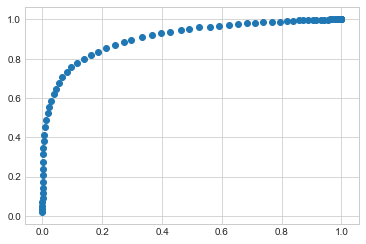

In [307]:
plt.scatter(rate[:,1], rate[:,2],marker='o');